In [127]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [128]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

In [129]:
cancer_indices_df = pd.read_csv('/content/drive/MyDrive/Data Mining lung/cancer patient data sets.csv')
cancer_indices_df.head(10)

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,33,1,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,Low
1,1,P10,17,1,3,1,5,3,4,2,...,1,3,7,8,6,2,1,7,2,Medium
2,2,P100,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
3,3,P1000,37,1,7,7,7,7,6,7,...,4,2,3,1,4,5,6,7,5,High
4,4,P101,46,1,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High
5,5,P102,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
6,6,P103,52,2,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,Low
7,7,P104,28,2,3,1,4,3,2,3,...,3,2,2,4,2,2,3,4,3,Low
8,8,P105,35,2,4,5,6,5,6,5,...,1,4,3,2,4,6,2,4,1,Medium
9,9,P106,46,1,2,3,4,2,4,3,...,1,2,4,6,5,4,2,1,5,Medium


In [130]:
cancer_indices_df.shape

(1000, 26)

In [131]:
cancer_indices_df['Level'].value_counts()

,count
Level,
High,365
Medium,332
Low,303


In [132]:
import pandas as pd
cancer_indices_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   index                     1000 non-null   int64 
 1   Patient Id                1000 non-null   object
 2   Age                       1000 non-null   int64 
 3   Gender                    1000 non-null   int64 
 4   Air Pollution             1000 non-null   int64 
 5   Alcohol use               1000 non-null   int64 
 6   Dust Allergy              1000 non-null   int64 
 7   OccuPational Hazards      1000 non-null   int64 
 8   Genetic Risk              1000 non-null   int64 
 9   chronic Lung Disease      1000 non-null   int64 
 10  Balanced Diet             1000 non-null   int64 
 11  Obesity                   1000 non-null   int64 
 12  Smoking                   1000 non-null   int64 
 13  Passive Smoker            1000 non-null   int64 
 14  Chest Pain               

In [133]:
cancer_indices_df.describe()

,index,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,...,Coughing of Blood,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring
count,1000.000000,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,37.174000,1.402000,3.8400,4.563000,5.165000,4.840000,4.580000,4.380000,4.491000,...,4.859000,3.856000,3.855000,4.240000,3.777000,3.746000,3.923000,3.536000,3.853000,2.926000
std,288.819436,12.005493,0.490547,2.0304,2.620477,1.980833,2.107805,2.126999,1.848518,2.135528,...,2.427965,2.244616,2.206546,2.285087,2.041921,2.270383,2.388048,1.832502,2.039007,1.474686
min,0.000000,14.000000,1.000000,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,249.750000,27.750000,1.000000,2.0000,2.000000,4.000000,3.000000,2.000000,3.000000,2.000000,...,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
50%,499.500000,36.000000,1.000000,3.0000,5.000000,6.000000,5.000000,5.000000,4.000000,4.000000,...,4.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000
75%,749.250000,45.000000,2.000000,6.0000,7.000000,7.000000,7.000000,7.000000,6.000000,7.000000,...,7.000000,5.000000,6.000000,6.000000,5.000000,5.000000,5.000000,5.000000,6.000000,4.000000
max,999.000000,73.000000,2.000000,8.0000,8.000000,8.000000,8.000000,7.000000,7.000000,7.000000,...,9.000000,9.000000,8.000000,9.000000,8.000000,8.000000,9.000000,7.000000,7.000000,7.000000


In [134]:
# Check unique values in the 'Level' column before mapping
print("Unique values in 'Level' column before mapping:")
print(cancer_indices_df['Level'].unique())


level_mapping = {'Low': 0, 'High': 1, 'Medium': 2}


cancer_indices_df['Level'] = cancer_indices_df['Level'].map(level_mapping)


y = cancer_indices_df['Level']
print("\n'Level' column after mapping and y creation:")
print(y)

Unique values in 'Level' column before mapping:
['Low' 'Medium' 'High']

'Level' column after mapping and y creation:
0      0
1      2
2      1
3      1
4      1
      ..
995    1
996    1
997    1
998    1
999    1
Name: Level, Length: 1000, dtype: int64


In [135]:
def eda_relationships(df, target_col="lung_cancer"):

    sns.set_theme(style="darkgrid", palette="dark")
    plt.style.use("dark_background")

    # Select numeric and categorical columns
    numeric_cols = df.select_dtypes(include=["int64", "float64"]).columns.drop("patient_id", errors="ignore")
    categorical_cols = df.select_dtypes(include=["object", "category"]).columns.drop(target_col, errors="ignore")

    #Correlation Heatmap
    plt.figure(figsize=(8, 6))
    corr = df[numeric_cols].corr()
    sns.heatmap(corr, annot=True, cmap="mako", center=0, linewidths=.5)
    plt.title("Correlation Heatmap (Numeric Features)", fontsize=14, color="w")
    plt.show()

    #Categorical vs Target
    for col in categorical_cols:
        plt.figure(figsize=(8, 5))
        sns.countplot(data=df, x=col, hue=target_col, palette="viridis")
        plt.title(f"{col} vs {target_col}", fontsize=14, color="w")
        plt.xticks(rotation=30)
        plt.show()

    # Numeric vs Target (Boxplots)
    for col in numeric_cols:
        plt.figure(figsize=(8, 5))
        sns.boxplot(data=df, x=target_col, y=col, palette="plasma")
        plt.title(f"{col} Distribution by {target_col}", fontsize=14, color="w")
        plt.show()

    # Pairplot(Relationships)
    selected_features = list(numeric_cols) + [target_col]
    sns.pairplot(df[selected_features], hue=target_col, palette="cubehelix", diag_kind="kde")
    plt.suptitle("Pairwise Relationships", y=1.02, color="w", fontsize=14)
    plt.show()

In [136]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency, ttest_ind, mannwhitneyu


from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, ExtraTreesClassifier
from sklearn.utils.class_weight import compute_class_weight
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import warnings
warnings.filterwarnings("ignore")

In [137]:

def eda_summary(filepath=None, df=None):


    if filepath is not None:
        df = pd.read_csv(filepath)
    elif df is None:
        raise ValueError("Please provide either a CSV filepath or a DataFrame.")

    print("\n--- First 5 Rows ---")
    display(df.head())

    print("\n--- Missing Values ---")
    print(df.isnull().sum())

    print("\n--- Duplicated Rows ---")
    print(df.duplicated().sum())

    print("\n--- Shape ---")
    print(df.shape)

    print("\n--- Description ---")
    display(df.describe(include='all'))

    print("\n--- Data Info ---")
    df.info()

    print("\n--- NULL Percentage ---")
    data_null = round(df.isna().sum() / df.shape[0] * 100, 2)
    display(data_null.to_frame(name='Percent NULL data (%)'))

    return df

In [138]:
def eda_report(filepath=None, df=None):


    if filepath is not None:
        df = pd.read_csv(filepath)
    elif df is None:
        raise ValueError("Please provide either a CSV filepath or a DataFrame.")


    report = pd.DataFrame({
        "Data Type": df.dtypes,
        "Missing Values": df.isnull().sum(),
        "Missing %": round(df.isnull().sum() / len(df) * 100, 2),
        "Unique Values": df.nunique()
    })


    report["Column Type"] = report["Data Type"].apply(
        lambda x: "Numeric" if pd.api.types.is_numeric_dtype(x)
        else "Categorical" if pd.api.types.is_string_dtype(x)
        else "Other"
    )


    duplicates = df.duplicated().sum()
    summary_row = pd.DataFrame({
        "Data Type": ["-"],
        "Missing Values": ["-"],
        "Missing %": ["-"],
        "Unique Values": ["-"],
        "Column Type": ["-"]
    }, index=["Duplicated Rows = " + str(duplicates)])

    report = pd.concat([report, summary_row])

    return report

In [139]:
eda_report(filepath="/content/drive/MyDrive/Data Mining lung/cancer patient data sets.csv")

,Data Type,Missing Values,Missing %,Unique Values,Column Type
index,int64,0,0.0,1000,Numeric
Patient Id,object,0,0.0,1000,Categorical
Age,int64,0,0.0,40,Numeric
Gender,int64,0,0.0,2,Numeric
Air Pollution,int64,0,0.0,8,Numeric
Alcohol use,int64,0,0.0,8,Numeric
Dust Allergy,int64,0,0.0,8,Numeric
OccuPational Hazards,int64,0,0.0,8,Numeric
Genetic Risk,int64,0,0.0,7,Numeric
chronic Lung Disease,int64,0,0.0,7,Numeric


In [140]:
#read file from function
df = eda_summary(filepath="/content/drive/MyDrive/Data Mining lung/cancer patient data sets.csv")


--- First 5 Rows ---


,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,33,1,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,Low
1,1,P10,17,1,3,1,5,3,4,2,...,1,3,7,8,6,2,1,7,2,Medium
2,2,P100,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
3,3,P1000,37,1,7,7,7,7,6,7,...,4,2,3,1,4,5,6,7,5,High
4,4,P101,46,1,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High



--- Missing Values ---
index                       0
Patient Id                  0
Age                         0
Gender                      0
Air Pollution               0
Alcohol use                 0
Dust Allergy                0
OccuPational Hazards        0
Genetic Risk                0
chronic Lung Disease        0
Balanced Diet               0
Obesity                     0
Smoking                     0
Passive Smoker              0
Chest Pain                  0
Coughing of Blood           0
Fatigue                     0
Weight Loss                 0
Shortness of Breath         0
Wheezing                    0
Swallowing Difficulty       0
Clubbing of Finger Nails    0
Frequent Cold               0
Dry Cough                   0
Snoring                     0
Level                       0
dtype: int64

--- Duplicated Rows ---
0

--- Shape ---
(1000, 26)

--- Description ---


,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
count,1000.000000,1000,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000
unique,NaN,1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
top,NaN,P999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,High
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,365
mean,499.500000,NaN,37.174000,1.402000,3.8400,4.563000,5.165000,4.840000,4.580000,4.380000,...,3.856000,3.855000,4.240000,3.777000,3.746000,3.923000,3.536000,3.853000,2.926000,NaN
std,288.819436,NaN,12.005493,0.490547,2.0304,2.620477,1.980833,2.107805,2.126999,1.848518,...,2.244616,2.206546,2.285087,2.041921,2.270383,2.388048,1.832502,2.039007,1.474686,NaN
min,0.000000,NaN,14.000000,1.000000,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN
25%,249.750000,NaN,27.750000,1.000000,2.0000,2.000000,4.000000,3.000000,2.000000,3.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,NaN
50%,499.500000,NaN,36.000000,1.000000,3.0000,5.000000,6.000000,5.000000,5.000000,4.000000,...,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,NaN
75%,749.250000,NaN,45.000000,2.000000,6.0000,7.000000,7.000000,7.000000,7.000000,6.000000,...,5.000000,6.000000,6.000000,5.000000,5.000000,5.000000,5.000000,6.000000,4.000000,NaN



--- Data Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   index                     1000 non-null   int64 
 1   Patient Id                1000 non-null   object
 2   Age                       1000 non-null   int64 
 3   Gender                    1000 non-null   int64 
 4   Air Pollution             1000 non-null   int64 
 5   Alcohol use               1000 non-null   int64 
 6   Dust Allergy              1000 non-null   int64 
 7   OccuPational Hazards      1000 non-null   int64 
 8   Genetic Risk              1000 non-null   int64 
 9   chronic Lung Disease      1000 non-null   int64 
 10  Balanced Diet             1000 non-null   int64 
 11  Obesity                   1000 non-null   int64 
 12  Smoking                   1000 non-null   int64 
 13  Passive Smoker            1000 non-null   int64 
 14  Chest 

,Percent NULL data (%)
index,0.0
Patient Id,0.0
Age,0.0
Gender,0.0
Air Pollution,0.0
Alcohol use,0.0
Dust Allergy,0.0
OccuPational Hazards,0.0
Genetic Risk,0.0
chronic Lung Disease,0.0


In [141]:
# Separate numerical and categorical attributes


numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.drop('Patient Id', errors='ignore')
df_numerical = df[numerical_cols]

categorical_cols = df.select_dtypes(include=['object', 'category']).columns
df_categorical = df[categorical_cols]

print("--- Numerical Attributes ---")
display(df_numerical.head())

print("\n--- Categorical Attributes ---")
display(df_categorical.head())

--- Numerical Attributes ---


,index,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,...,Coughing of Blood,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring
0,0,33,1,2,4,5,4,3,2,2,...,4,3,4,2,2,3,1,2,3,4
1,1,17,1,3,1,5,3,4,2,2,...,3,1,3,7,8,6,2,1,7,2
2,2,35,1,4,5,6,5,5,4,6,...,8,8,7,9,2,1,4,6,7,2
3,3,37,1,7,7,7,7,6,7,7,...,8,4,2,3,1,4,5,6,7,5
4,4,46,1,6,8,7,7,7,6,7,...,9,3,2,4,1,4,2,4,2,3



--- Categorical Attributes ---


,Patient Id,Level
0,P1,Low
1,P10,Medium
2,P100,High
3,P1000,High
4,P101,High


In [142]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency, ttest_ind, mannwhitneyu


from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, ExtraTreesClassifier
from sklearn.utils.class_weight import compute_class_weight
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import warnings
warnings.filterwarnings("ignore")

def eda_visuals(df, corr_method='spearman'):
    """
    Generate visualization plots for EDA:
    - Boxplots for numerical columns (outlier detection)
    - Distributions (histograms with KDE) for numerical columns
    - Pie charts for categorical columns
    - Correlation heatmap (default = Spearman)
    """


    sns.set_theme(style="whitegrid", palette="pastel")
    plt.style.use("default")


    numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
    categorical_cols = df.select_dtypes(include=['object', 'category']).columns


    palette = sns.color_palette("husl", len(numerical_cols))


    plt.figure(figsize=(25, 18))
    for i, col in enumerate(numerical_cols, 1):
        plt.subplot(6, 6, i)
        sns.boxplot(y=df[col], color=palette[i-1])
        plt.title(f'Boxplot of {col}')
    plt.tight_layout()
    plt.show()


    plt.figure(figsize=(25, 15))
    for i, col in enumerate(numerical_cols, 1):
        plt.subplot(6, 6, i)
        sns.histplot(df[col], kde=True, color=palette[i-1], bins=30)
        plt.title(f'Distribution of {col}')
    plt.tight_layout()
    plt.show()


    if len(categorical_cols) > 0:
        n_categorical = len(categorical_cols)
        n_cols = 3
        n_rows = (n_categorical + n_cols - 1) // n_cols

        plt.figure(figsize=(n_cols * 6, n_rows * 6))
        plot_index = 1
        for i, col in enumerate(categorical_cols, 1):
            if col == 'Patient Id':
                continue
            plt.subplot(n_rows, n_cols, plot_index)
            df[col].value_counts().plot.pie(
                autopct='%1.1f%%',
                startangle=90,
                cmap='tab20'
            )
            plt.title(f'Pie Chart of {col}')
            plt.ylabel('')
            plot_index += 1
        plt.tight_layout()
        plt.show()

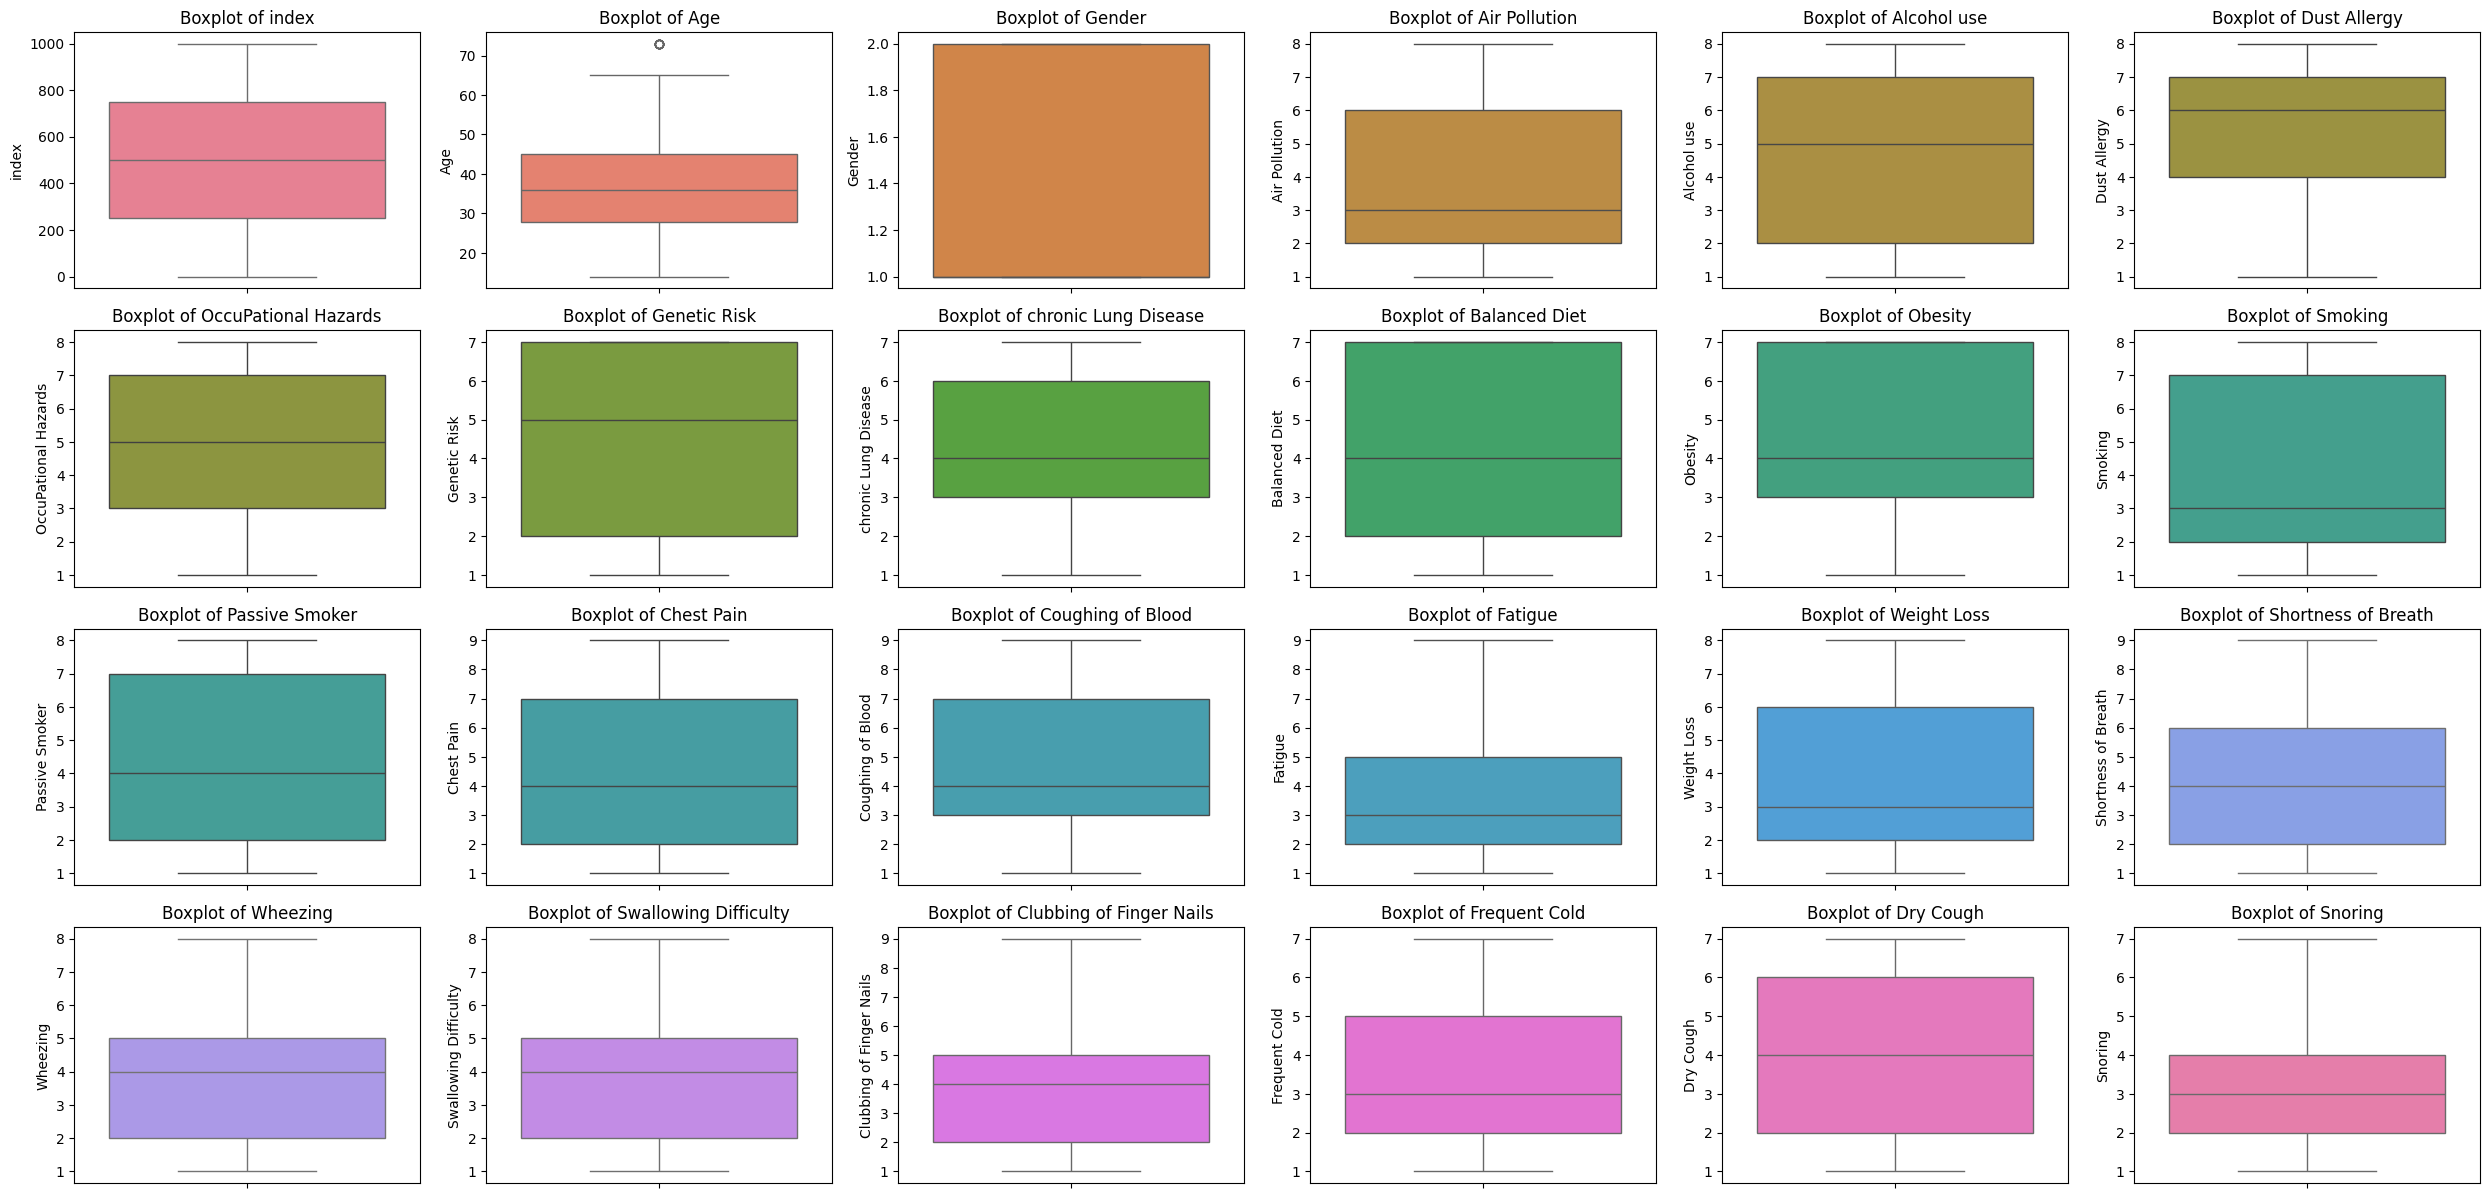

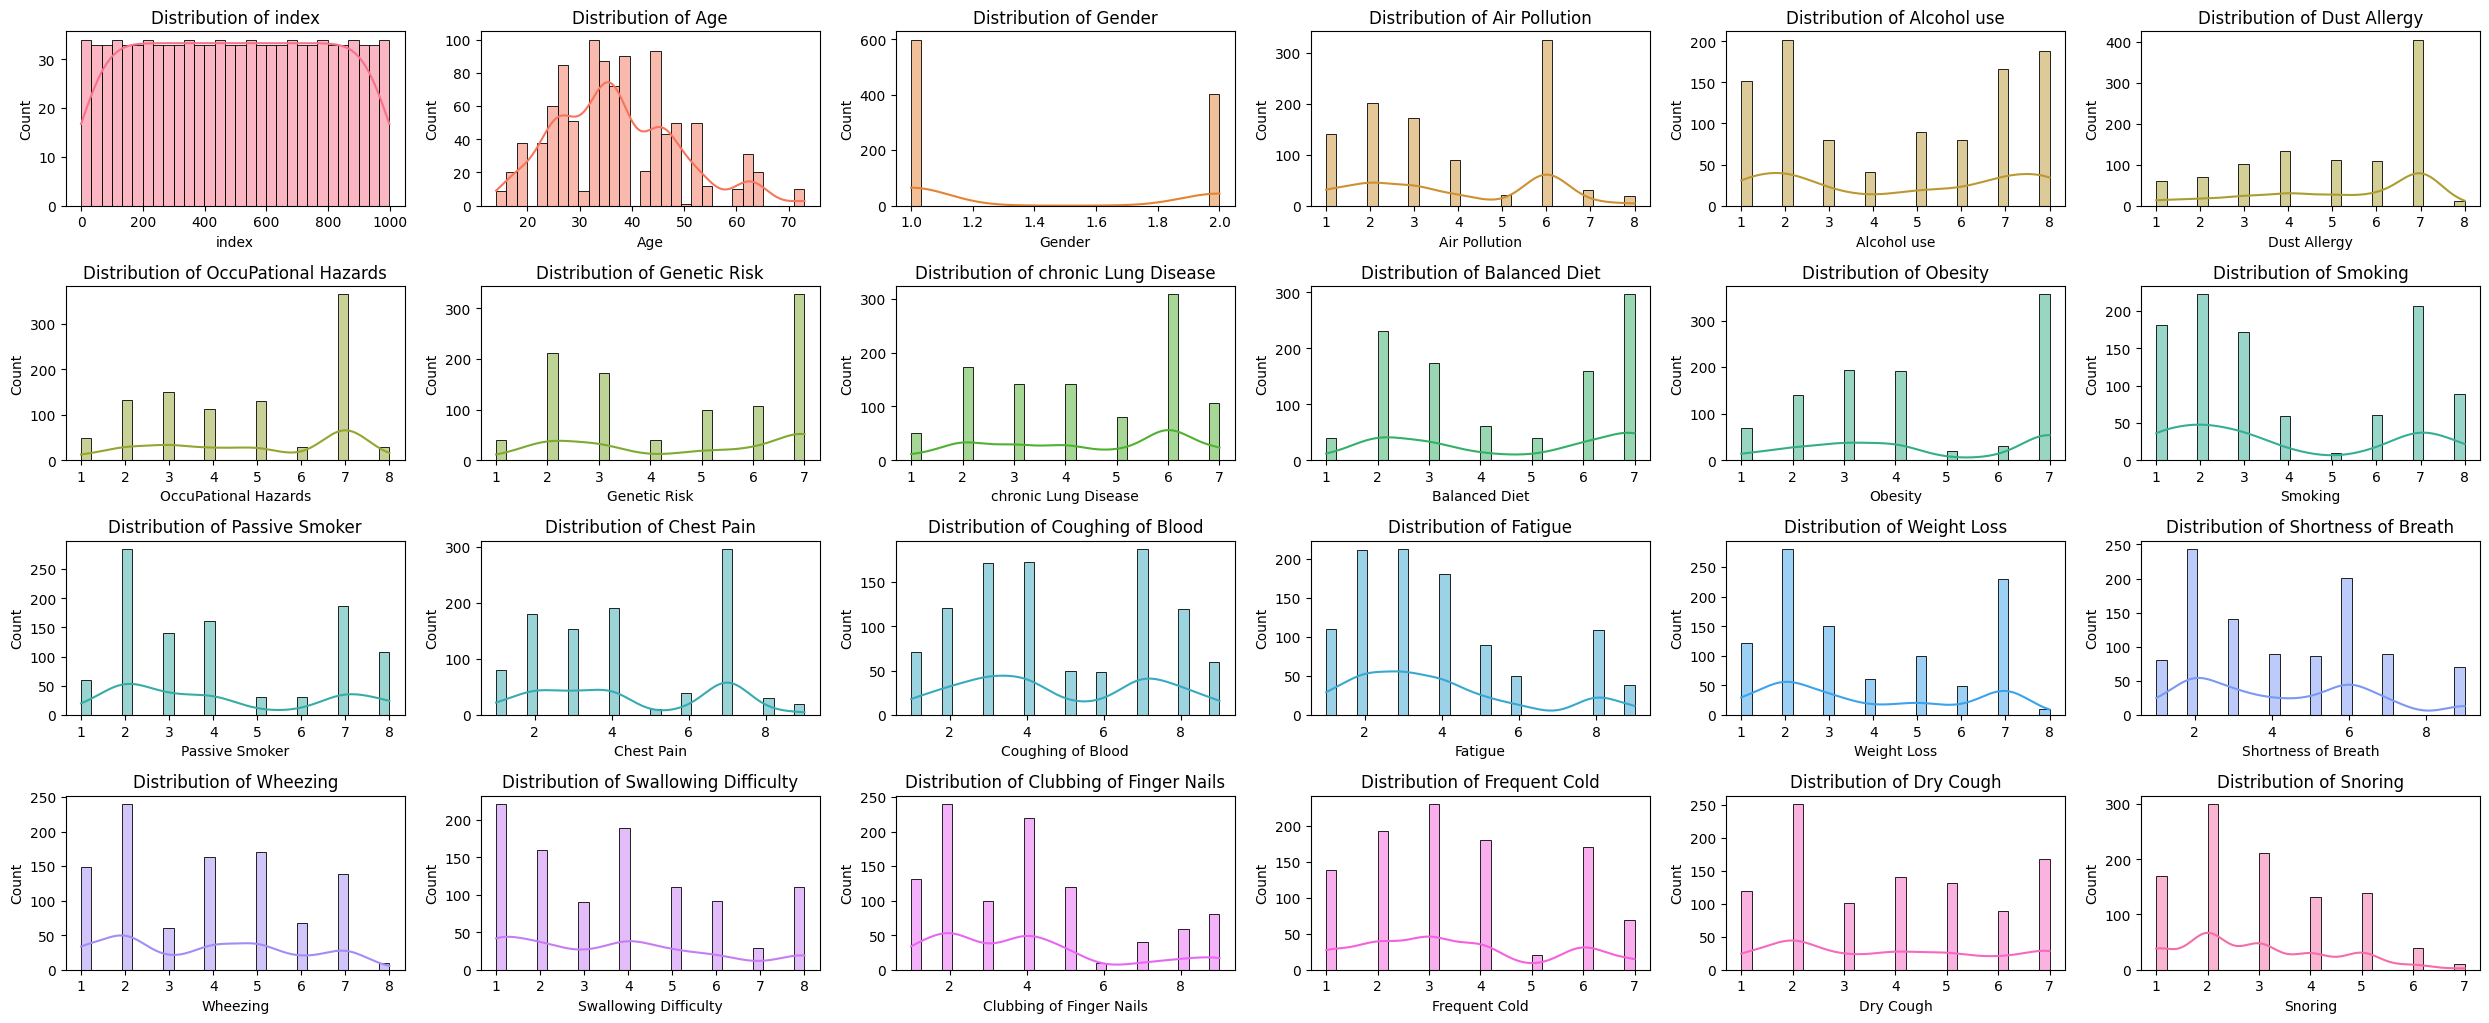

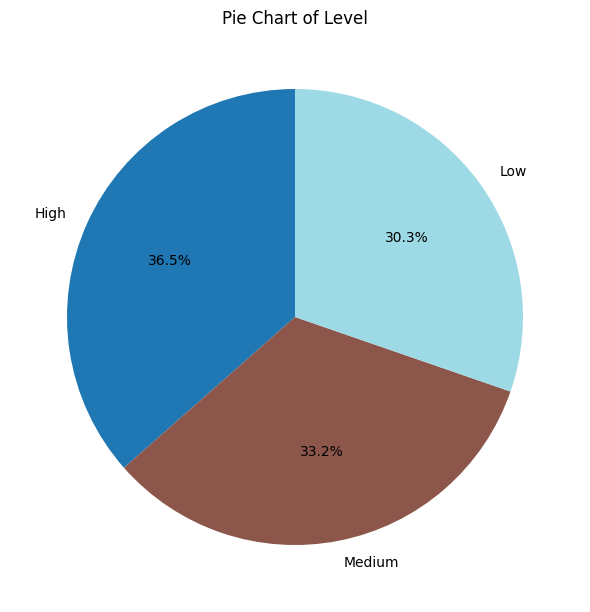

In [143]:
#call function
eda_visuals(df)

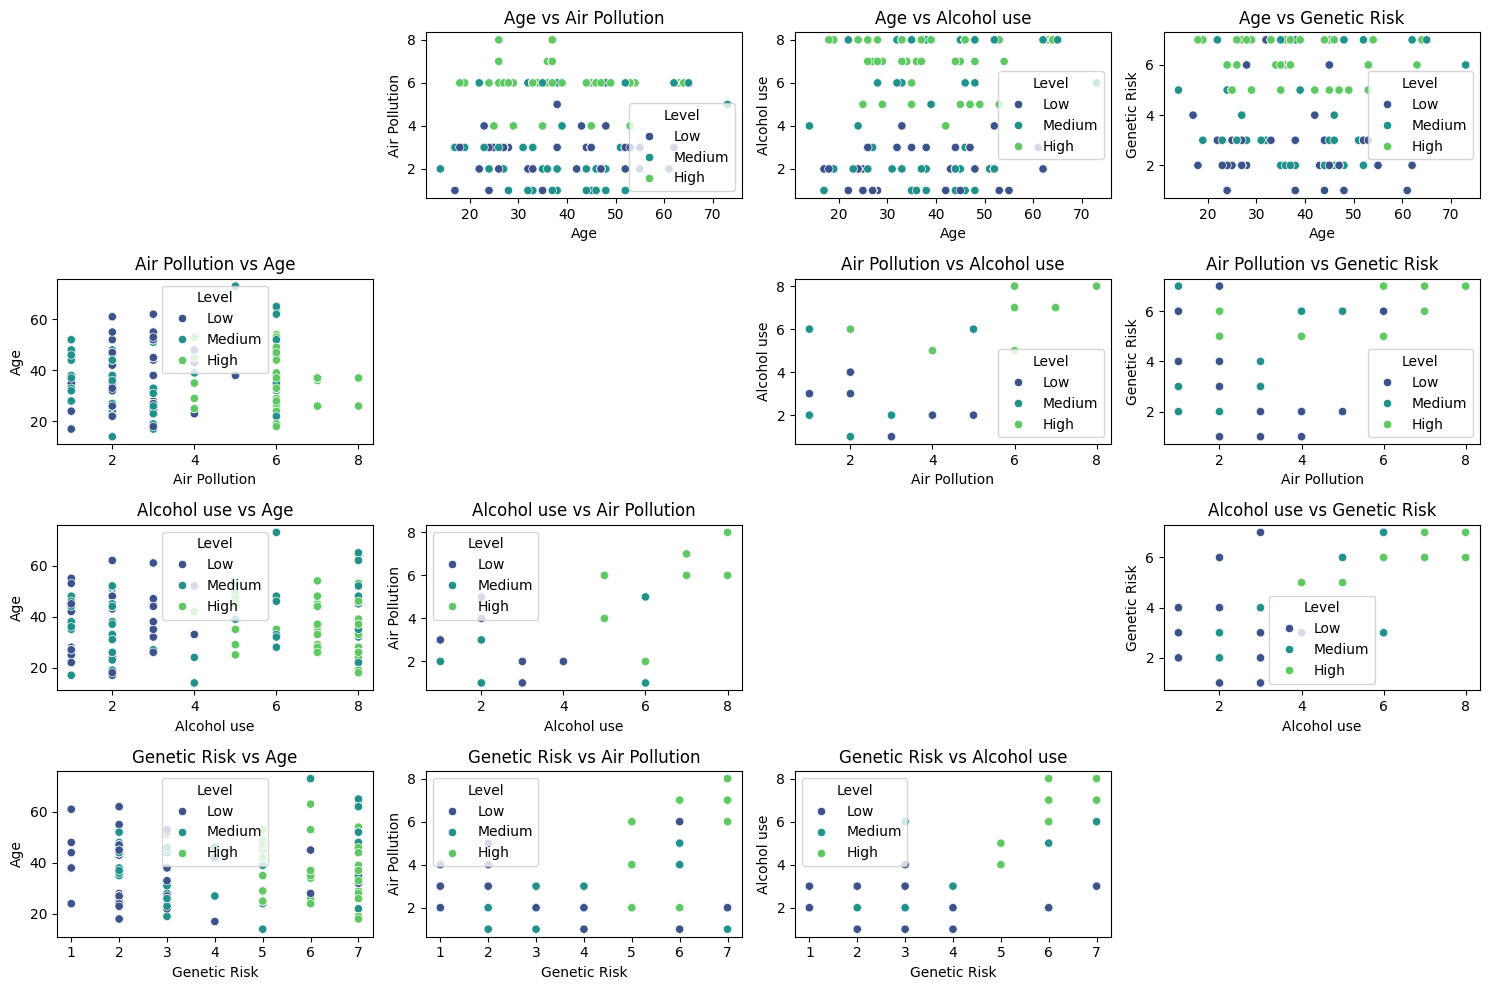

In [144]:
# Create scatter plots for selected numerical columns
numerical_cols_for_scatter = ['Age', 'Air Pollution', 'Alcohol use', 'Genetic Risk']

plt.figure(figsize=(15, 10))
for i, col1 in enumerate(numerical_cols_for_scatter):
    for j, col2 in enumerate(numerical_cols_for_scatter):
        if col1 != col2:
            plt.subplot(len(numerical_cols_for_scatter), len(numerical_cols_for_scatter), i * len(numerical_cols_for_scatter) + j + 1)
            sns.scatterplot(data=df, x=col1, y=col2, hue='Level', palette='viridis')
            plt.title(f'{col1} vs {col2}')
plt.tight_layout()
plt.show()

In [145]:
def eda_stats_tests_viz(df, target_col="lung_cancer"):
    """
    Perform statistical tests and visualize significance:
    - Chi-square test for categorical vs target
    - T-test / Mann-Whitney U test for numerical vs target
    - Returns a DataFrame with p-values
    - Generates barplot showing p-values for all features
    """

    results = []


    numeric_cols = df.select_dtypes(include=["int64", "float64"]).columns.drop("patient_id", errors="ignore")
    categorical_cols = df.select_dtypes(include=["object", "category"]).columns.drop(target_col, errors="ignore")

    for col in categorical_cols:
        contingency = pd.crosstab(df[col], df[target_col])
        chi2, p, dof, expected = chi2_contingency(contingency)
        results.append({
            "Feature": col,
            "Test": "Chi-square",
            "p-value": p,
            "Significant": "Yes ✅" if p < 0.05 else "No ❌"
        })


    for col in numeric_cols:
        groups = df.groupby(target_col)[col].apply(list)
        if len(groups) == 2:
            group1, group2 = groups.iloc[0], groups.iloc[1]
            try:
                stat, p = ttest_ind(group1, group2, nan_policy="omit")
                test_used = "T-test"
            except:
                stat, p = mannwhitneyu(group1, group2, alternative="two-sided")
                test_used = "Mann-Whitney U"
            results.append({
                "Feature": col,
                "Test": test_used,
                "p-value": p,
                "Significant": "Yes ✅" if p < 0.05 else "No ❌"
            })

    df_results = pd.DataFrame(results)

    #  Visualization
    plt.figure(figsize=(10,6))
    sns.barplot(
        data=df_results.sort_values("p-value"),
        x="p-value",
        y="Feature",
        hue="Significant",
        dodge=False,
        palette={"Yes ✅":"seagreen", "No ❌":"salmon"}
    )
    plt.axvline(0.05, color="yellow", linestyle="--", label="Significance Threshold (0.05)")
    plt.title("Feature Significance vs Target", fontsize=14)
    plt.xlabel("p-value")
    plt.ylabel("Feature")
    plt.legend()
    plt.show()

    return df_results

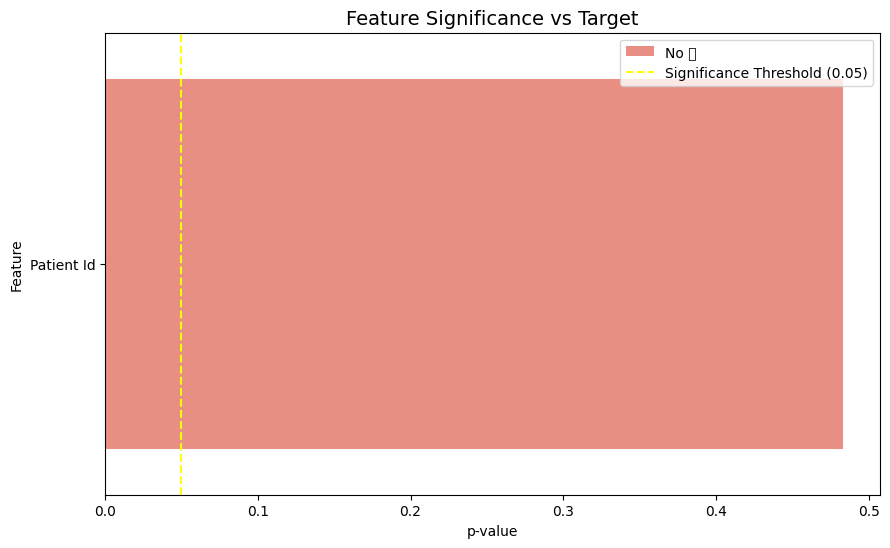

,Feature,Test,p-value,Significant
0,Patient Id,Chi-square,0.48318,No ❌


In [146]:
#call function
stats= eda_stats_tests_viz(df, target_col="Level")
stats

In [147]:
features =df[['Air Pollution','OccuPational Hazards','Passive Smoker','Genetic Risk',
              'Smoking','Age','Level']]

In [148]:

features = features.copy()


In [149]:
features.head()

,Air Pollution,OccuPational Hazards,Passive Smoker,Genetic Risk,Smoking,Age,Level
0,2,4,2,3,3,33,Low
1,3,3,4,4,2,17,Medium
2,4,5,3,5,2,35,High
3,7,7,7,6,7,37,High
4,6,7,7,7,8,46,High


In [150]:
#call Label encoder from Sklearn to convert features
from sklearn.preprocessing import LabelEncoder, StandardScaler
le = LabelEncoder()

for col in features:
    features[col] = le.fit_transform(features[col])

In [151]:
#show after Encoded
features.head()

,Air Pollution,OccuPational Hazards,Passive Smoker,Genetic Risk,Smoking,Age,Level
0,1,3,1,2,2,14,1
1,2,2,3,3,1,1,2
2,3,4,2,4,1,16,0
3,6,6,6,5,6,18,0
4,5,6,6,6,7,25,0


In [152]:
X=features.iloc[:,:-1]
y=features.iloc[:,-1]

In [153]:
#split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [154]:
#show train data after splited
X_train.head()

,Air Pollution,OccuPational Hazards,Passive Smoker,Genetic Risk,Smoking,Age
29,0,4,2,2,2,10
535,5,6,6,5,7,31
695,0,4,2,2,2,10
557,5,6,1,6,0,35
836,1,1,2,0,3,19


In [155]:
#show traget in data after split
y_train.head()

,Level
29,2
535,0
695,2
557,2
836,1


In [156]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import numpy as np


features = cancer_indices_df[['Air Pollution','OccuPational Hazards','Passive Smoker','Genetic Risk',
                              'Smoking','Age','Level']].copy()

le = LabelEncoder()
for col in features.columns:
    features[col] = le.fit_transform(features[col])


X = features.drop('Level', axis=1)
y = features['Level']


X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print("Training data shape:", X_train.shape, y_train.shape)
print("Testing data shape:", X_test.shape, y_test.shape)
print("Validation data shape:", X_val.shape, y_val.shape)

Training data shape: (700, 6) (700,)
Testing data shape: (150, 6) (150,)
Validation data shape: (150, 6) (150,)


In [157]:
X = features.drop('Level', axis=1)
y = features['Level']


DecisionTreeClassifier Validation Accuracy: 0.8733

DecisionTreeClassifier Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.60      0.75        48
           1       1.00      1.00      1.00        52
           2       0.72      1.00      0.84        50

    accuracy                           0.87       150
   macro avg       0.91      0.87      0.86       150
weighted avg       0.91      0.87      0.87       150



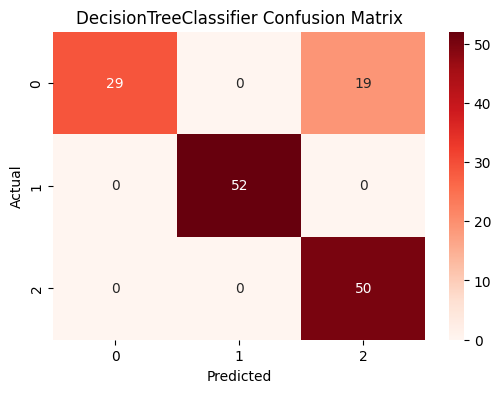

In [158]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

dt_model = DecisionTreeClassifier(max_depth=5, min_samples_leaf=5, random_state=42)
dt_model.fit(X_train, y_train)
dt_val_pred = dt_model.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_val_pred)
dt_class_report = classification_report(y_test, dt_val_pred)
dt_conf_matrix = confusion_matrix(y_test, dt_val_pred)

print("\nDecisionTreeClassifier Validation Accuracy: {:.4f}".format(dt_accuracy))
print("\nDecisionTreeClassifier Classification Report:\n", dt_class_report)
plt.figure(figsize=(6,4))
sns.heatmap(dt_conf_matrix, annot=True, fmt='d', cmap='Reds')
plt.title('DecisionTreeClassifier Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


RandomForestClassifier Validation Accuracy: 0.8600

RandomForestClassifier Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.92      0.81        48
           1       0.96      1.00      0.98        52
           2       0.94      0.66      0.78        50

    accuracy                           0.86       150
   macro avg       0.88      0.86      0.85       150
weighted avg       0.88      0.86      0.86       150



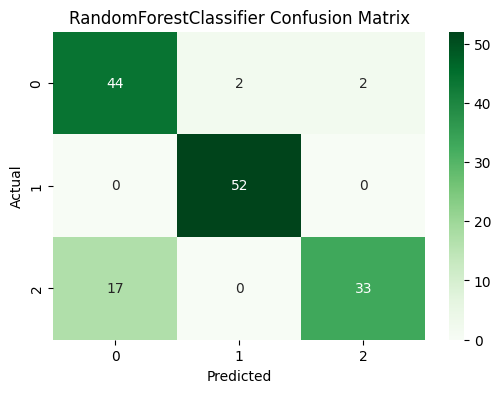

In [159]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

rf_model = RandomForestClassifier(n_estimators=50, max_depth=4, min_samples_leaf=20, random_state=42)
rf_model.fit(X_train, y_train)
rf_val_pred = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_val_pred)
rf_class_report = classification_report(y_test, rf_val_pred)
rf_conf_matrix = confusion_matrix(y_test, rf_val_pred)

print("\nRandomForestClassifier Validation Accuracy: {:.4f}".format(rf_accuracy))
print("\nRandomForestClassifier Classification Report:\n", rf_class_report)
plt.figure(figsize=(6,4))
sns.heatmap(rf_conf_matrix, annot=True, fmt='d', cmap='Greens')
plt.title('RandomForestClassifier Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


KNN Classifier Validation Accuracy: 0.8733

KNN Classifier Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.75      0.81        48
           1       0.98      0.98      0.98        52
           2       0.77      0.88      0.82        50

    accuracy                           0.87       150
   macro avg       0.88      0.87      0.87       150
weighted avg       0.88      0.87      0.87       150



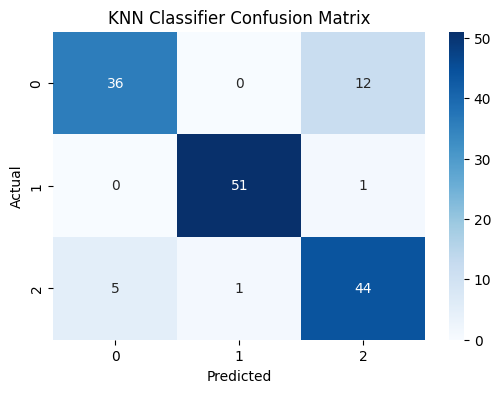

In [160]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler


scaler_knn_individual = StandardScaler()
X_train_scaled_knn = scaler_knn_individual.fit_transform(X_train)
X_test_scaled_knn = scaler_knn_individual.transform(X_test)

# KNN Classifier
knn_model = KNeighborsClassifier(n_neighbors=20)
knn_model.fit(X_train_scaled_knn, y_train)
knn_val_pred = knn_model.predict(X_test_scaled_knn)
knn_accuracy = accuracy_score(y_test, knn_val_pred)
knn_class_report = classification_report(y_test, knn_val_pred)
knn_conf_matrix = confusion_matrix(y_test, knn_val_pred)

print(
    "\nKNN Classifier Validation Accuracy: {:.4f}".format(knn_accuracy)
)
print("\nKNN Classifier Classification Report:\n", knn_class_report)
plt.figure(figsize=(6, 4))
sns.heatmap(knn_conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('KNN Classifier Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


SVM Classifier Validation Accuracy: 0.9733

SVM Classifier Classification Report:
               precision    recall  f1-score   support

           0       0.92      1.00      0.96        48
           1       1.00      1.00      1.00        52
           2       1.00      0.92      0.96        50

    accuracy                           0.97       150
   macro avg       0.97      0.97      0.97       150
weighted avg       0.98      0.97      0.97       150



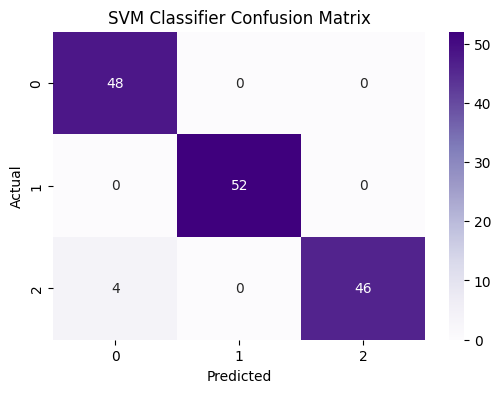

In [161]:
# SVM Classifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler


scaler_svm_individual = StandardScaler()
X_train_scaled_svm = scaler_svm_individual.fit_transform(X_train)
X_test_scaled_svm = scaler_svm_individual.transform(X_test)

svm_model = SVC(random_state=42, probability=True)
svm_model.fit(X_train_scaled_svm, y_train)

svm_val_pred = svm_model.predict(X_test_scaled_svm)

svm_accuracy = accuracy_score(y_test, svm_val_pred)
svm_class_report = classification_report(y_test, svm_val_pred)
svm_conf_matrix = confusion_matrix(y_test, svm_val_pred)

print("\nSVM Classifier Validation Accuracy: {:.4f}".format(svm_accuracy))
print("\nSVM Classifier Classification Report:\n", svm_class_report)
plt.figure(figsize=(6,4))
sns.heatmap(svm_conf_matrix, annot=True, fmt='d', cmap='Purples')
plt.title('SVM Classifier Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


Naive Bayes Classifier Validation Accuracy: 0.6867

Naive Bayes Classifier Classification Report:
               precision    recall  f1-score   support

           0       0.60      0.88      0.71        48
           1       0.89      0.81      0.85        52
           2       0.58      0.38      0.46        50

    accuracy                           0.69       150
   macro avg       0.69      0.69      0.67       150
weighted avg       0.69      0.69      0.67       150



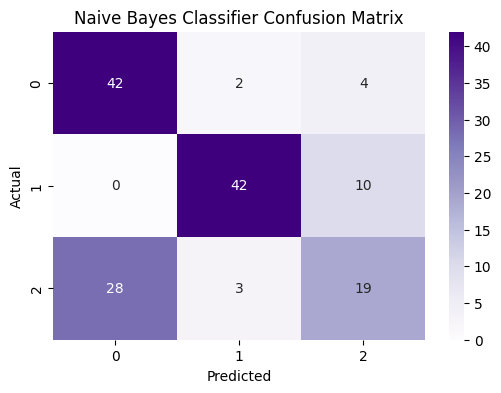

In [162]:
# Naive Bayes Classifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
nb_val_pred = nb_model.predict(X_test)
nb_accuracy = accuracy_score(y_test, nb_val_pred)
nb_class_report = classification_report(y_test, nb_val_pred)
nb_conf_matrix = confusion_matrix(y_test, nb_val_pred)

print("\nNaive Bayes Classifier Validation Accuracy: {:.4f}".format(nb_accuracy))
print("\nNaive Bayes Classifier Classification Report:\n", nb_class_report)
plt.figure(figsize=(6,4))
sns.heatmap(nb_conf_matrix, annot=True, fmt='d', cmap='Purples')
plt.title('Naive Bayes Classifier Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


Training ANN Model...
ANN Model training complete.

ANN Classifier Test Accuracy: 0.8467

ANN Classifier Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.88      0.88        48
           1       0.90      0.85      0.87        52
           2       0.77      0.82      0.80        50

    accuracy                           0.85       150
   macro avg       0.85      0.85      0.85       150
weighted avg       0.85      0.85      0.85       150



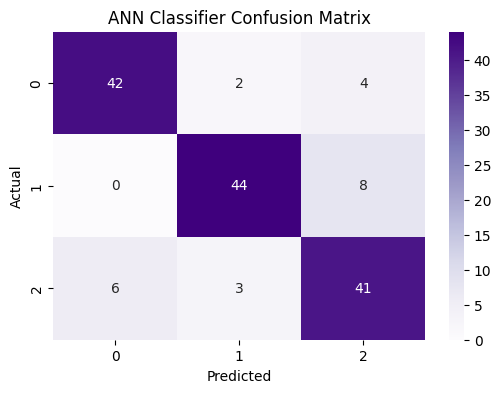

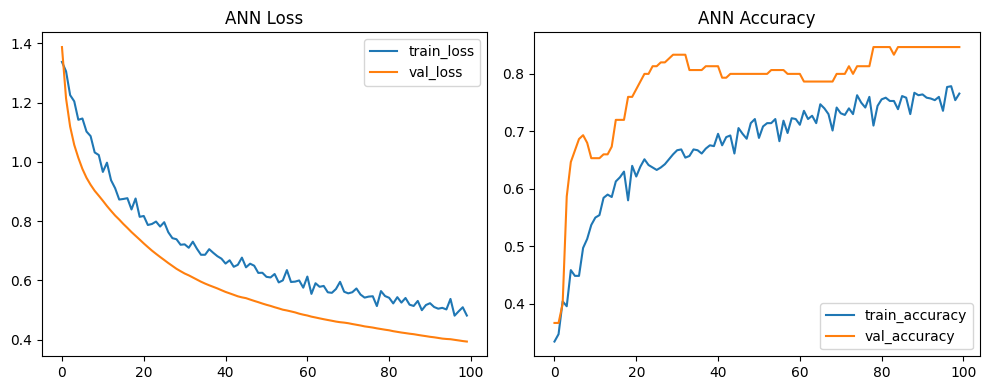

In [163]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.utils.class_weight import compute_class_weight
from tensorflow import keras
from tensorflow.keras import layers

classes = np.unique(y_train)
class_weight_dict = dict(zip(classes, compute_class_weight(class_weight='balanced', classes=classes, y=y_train)))


input_dl = X_train.shape[1]
ann_model = keras.Sequential([
    layers.Input(shape=(input_dl,)),
    layers.Dense(64, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.2),
    layers.Dense(32, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(len(np.unique(y_train)), activation='softmax')
])

# Compile the ANN model
ann_model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=1e-4),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy', keras.metrics.SparseCategoricalAccuracy(name='sparse_categorical_accuracy')]
)

# Train the ANN model
print("\nTraining ANN Model...")
history = ann_model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=100,
    batch_size=64,
    class_weight=class_weight_dict,
    verbose=0
)
print("ANN Model training complete.")


test_loss, test_acc, test_sparse_cat_acc = ann_model.evaluate(X_test, y_test, verbose=0)

y_pred_prob_ann = ann_model.predict(X_test, verbose=0)
y_pred_ann = np.argmax(y_pred_prob_ann, axis=1)

ann_accuracy = accuracy_score(y_test, y_pred_ann)
ann_class_report = classification_report(y_test, y_pred_ann)
ann_conf_matrix = confusion_matrix(y_test, y_pred_ann)

print("\nANN Classifier Test Accuracy: {:.4f}".format(ann_accuracy))
print("\nANN Classifier Classification Report:\n", ann_class_report)


plt.figure(figsize=(6,4))
sns.heatmap(ann_conf_matrix, annot=True, fmt='d', cmap='Purples')
plt.title('ANN Classifier Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('ANN Loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['sparse_categorical_accuracy'], label='train_accuracy')
plt.plot(history.history['val_sparse_categorical_accuracy'], label='val_accuracy')
plt.title('ANN Accuracy')
plt.legend()
plt.tight_layout()
plt.show()

In [164]:
#bulding Deeplearning model (layers)
input_dl = X_train.shape[1]
model = keras.Sequential([
    layers.Input(shape=(input_dl,)),
    layers.Dense(64, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.2),
    layers.Dense(32, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(len(np.unique(y_train)), activation='softmax')
])

In [165]:
#model
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=1e-4),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy', keras.metrics.SparseCategoricalAccuracy(name='sparse_categorical_accuracy')]
)
model.summary()

Model: "sequential_25"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_75 (Dense)                │ (None, 64)             │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_25          │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_50 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_76 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_51 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_77 (Dense)                │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,883 (11.26 KB)

 Trainable params: 2,755 (10.76 KB)

 Non-trainable params: 128 (512.00 B)

In [166]:
#Number of samples for each class.
print(pd.Series(y_train).value_counts())

Level
1    246
2    235
0    219
Name: count, dtype: int64


In [167]:
#Percentage of each class
print(pd.Series(y_train).value_counts(normalize=True) * 100)

Level
1    35.142857
2    33.571429
0    31.285714
Name: proportion, dtype: float64


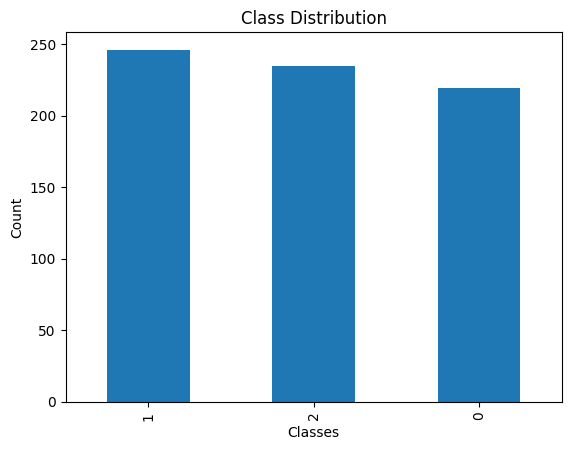

In [168]:
pd.Series(y_train).value_counts().plot(kind='bar')
plt.title("Class Distribution")
plt.xlabel("Classes")
plt.ylabel("Count")
plt.show()

In [169]:
#It retrieves the different categories (labels) present in the data y_train
def get_class_weights(y):

    classes = np.unique(y)


    class_weights = compute_class_weight(class_weight='balanced',
                                         classes=classes,
                                         y=y)
    class_weight_dict = dict(zip(classes, class_weights))

    print("Class weights:", class_weight_dict)
    return class_weight_dict

In [170]:
#show the result
weights = get_class_weights(y_train)

Class weights: {np.int64(0): np.float64(1.06544901065449), np.int64(1): np.float64(0.948509485094851), np.int64(2): np.float64(0.9929078014184397)}


In [171]:
classes = np.unique(y_train)
class_weights = compute_class_weight(class_weight='balanced',
                                     classes=classes,
                                     y=y_train)

class_weight_dict = dict(zip(classes, class_weights))
print("Class Weights:", class_weight_dict)

Class Weights: {np.int64(0): np.float64(1.06544901065449), np.int64(1): np.float64(0.948509485094851), np.int64(2): np.float64(0.9929078014184397)}


In [172]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=100,
    batch_size=64,
    class_weight=class_weight_dict,
    verbose=1
)

Epoch 1/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 6s 285ms/step - accuracy: 0.4724 - loss: 1.1401 - sparse_categorical_accuracy: 0.4724 - val_accuracy: 0.3333 - val_loss: 1.6772 - val_sparse_categorical_accuracy: 0.3333
Epoch 2/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5389 - loss: 1.0230 - sparse_categorical_accuracy: 0.5389 - val_accuracy: 0.3533 - val_loss: 1.3875 - val_sparse_categorical_accuracy: 0.3533
Epoch 3/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5109 - loss: 1.0493 - sparse_categorical_accuracy: 0.5109 - val_accuracy: 0.3267 - val_loss: 1.2030 - val_sparse_categorical_accuracy: 0.3267
Epoch 4/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5185 - loss: 1.0547 - sparse_categorical_accuracy: 0.5185 - val_accuracy: 0.3333 - val_loss: 1.0797 - val_sparse_categorical_accuracy: 0.3333
Epoch 5/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5204 - loss: 0.9974 - sparse_categorical_accuracy: 0.5204 - val_accuracy: 0.4933 - val_loss: 0.9830 -

In [173]:
#evaluate for new data
test_loss, test_acc, test_auc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")
print(f"Test AUC: {test_auc:.4f}")

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8258 - loss: 0.3566 - sparse_categorical_accuracy: 0.8258 
Test Accuracy: 0.8133
Test AUC: 0.8133


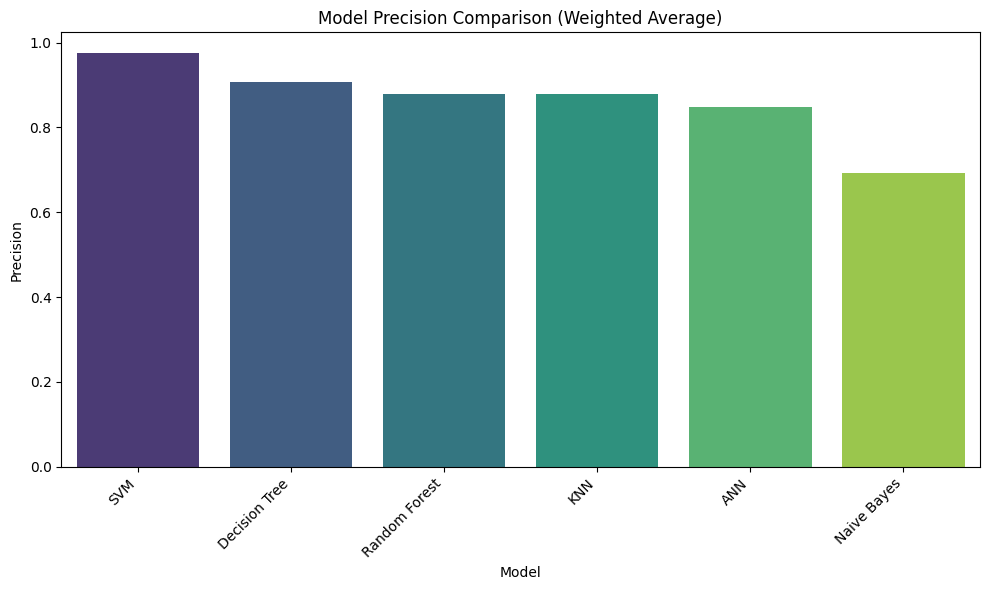

In [174]:
# Extract precision values from classification reports
precision_scores = {
    'Decision Tree': classification_report(y_test, dt_val_pred, output_dict=True)['weighted avg']['precision'],
    'Random Forest': classification_report(y_test, rf_val_pred, output_dict=True)['weighted avg']['precision'],
    'KNN': classification_report(y_test, knn_val_pred, output_dict=True)['weighted avg']['precision'],
    'Naive Bayes': classification_report(y_test, nb_val_pred, output_dict=True)['weighted avg']['precision'],
    'SVM': classification_report(y_test, svm_val_pred, output_dict=True)['weighted avg']['precision'],
    'ANN': classification_report(y_test, y_pred_ann, output_dict=True)['weighted avg']['precision']
}

precision_df = pd.DataFrame.from_dict(precision_scores, orient='index', columns=['Precision'])


precision_df = precision_df.sort_values(by='Precision', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=precision_df.index, y='Precision', data=precision_df, palette='viridis')
plt.title('Model Precision Comparison (Weighted Average)')
plt.xlabel('Model')
plt.ylabel('Precision')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 91ms/step
Test ROC AUC (OvR): 0.9630989535985335

Classification report:

              precision    recall  f1-score   support

           0       0.80      0.83      0.82        48
           1       0.92      0.85      0.88        52
           2       0.73      0.76      0.75        50

    accuracy                           0.81       150
   macro avg       0.82      0.81      0.81       150
weighted avg       0.82      0.81      0.81       150



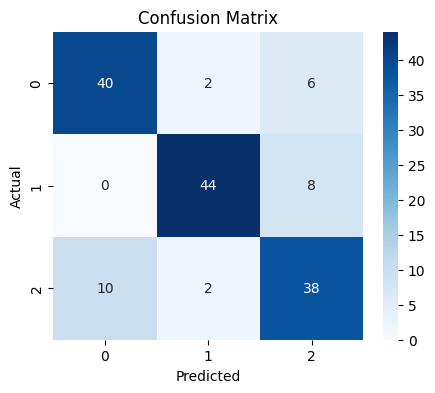

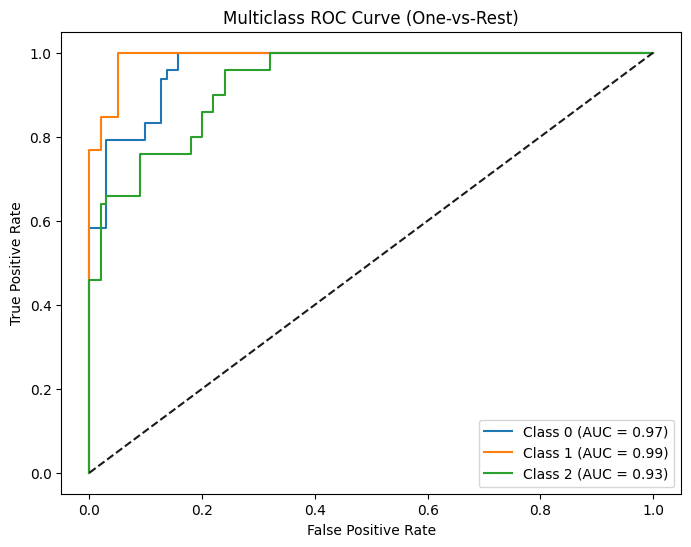

In [175]:
y_pred_prob = model.predict(X_test)

y_pred = np.argmax(y_pred_prob, axis=1)


# Calculate ROC AUC for multiclass
print('Test ROC AUC (OvR):', roc_auc_score(y_test, y_pred_prob, multi_class='ovr'))



print('\nClassification report:\n')
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# ROC curve for multiclass (one-vs-rest)
plt.figure(figsize=(8, 6))
classes = np.unique(y_test)
for i in range(len(classes)):
    # Get the true labels for the current class (1 if it's the current class, 0 otherwise)
    y_true_class = (y_test == classes[i]).astype(int)

    y_pred_prob_class = y_pred_prob[:, i]


    fpr, tpr, _ = roc_curve(y_true_class, y_pred_prob_class)

    plt.plot(fpr, tpr, label=f'Class {classes[i]} (AUC = {roc_auc_score(y_true_class, y_pred_prob_class):.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multiclass ROC Curve (One-vs-Rest)')
plt.legend()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step
   Sample_ID  Predicted_Probability_of_Class  Predicted_Class_Index  \
0          1                        0.468270                      0   
1          2                        0.854265                      0   
2          3                        0.901385                      1   
3          4                        0.966605                      0   
4          5                        0.842164                      1   
5          6                        0.624290                      0   
6          7                        0.703407                      2   
7          8                        0.567373                      1   
8          9                        0.986578                      1   
9         10                        0.980362                      1   

  Predicted_Class  
0             Low  
1             Low  
2            High  
3             Low  
4            High  
5             Low  
6          Medium  
7            High  

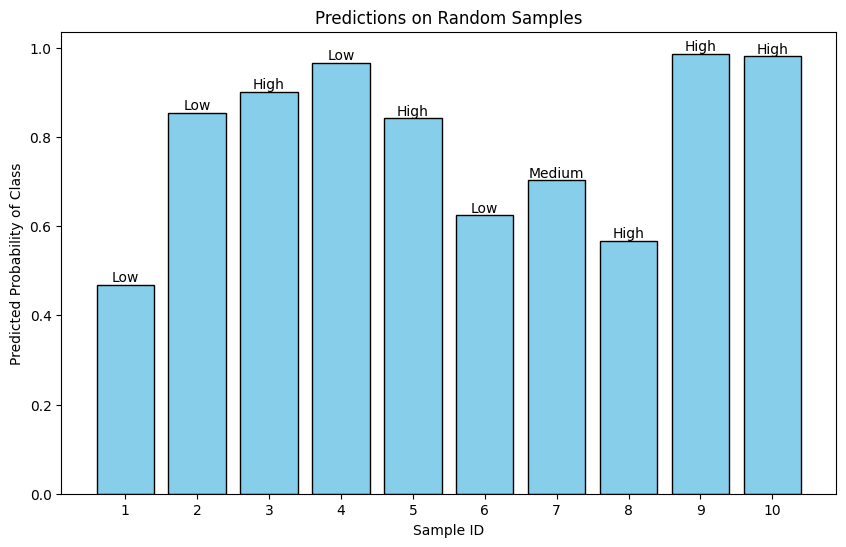

In [176]:
n_features = X_train.shape[1]

# Generate random 10 samples that are more representative of the actual feature distribution
# by creating random integers within the min/max range of each feature in X_train.
random_samples = np.zeros((10, n_features))
for i in range(n_features):
    min_val = X_train.iloc[:, i].min()
    max_val = X_train.iloc[:, i].max()
    random_samples[:, i] = np.random.randint(min_val, max_val + 1, 10)


preds_prob = model.predict(random_samples)


classes = np.argmax(preds_prob, axis=1)

preds = np.max(preds_prob, axis=1)

# Define the reverse mapping for display purposes
reverse_level_mapping = {0: 'Low', 1: 'High', 2: 'Medium'}

df_results = pd.DataFrame({
    "Sample_ID": range(1, 11),
    "Predicted_Probability_of_Class": preds,
    "Predicted_Class_Index": classes,
    "Predicted_Class": [reverse_level_mapping[idx] for idx in classes]
})

print(df_results)


plt.figure(figsize=(10, 6))
plt.bar(df_results["Sample_ID"], df_results["Predicted_Probability_of_Class"], color="skyblue", edgecolor="black")

# plt.axhline(0.5, color="red", linestyle="--", label="Threshold = 0.5") # Threshold of 0.5 is not directly applicable for multiclass probabilities of specific classes
plt.xticks(df_results["Sample_ID"])
plt.xlabel("Sample ID")
plt.ylabel("Predicted Probability of Class")
plt.title("Predictions on Random Samples")

for i, row in df_results.iterrows():
    plt.text(row['Sample_ID'], row['Predicted_Probability_of_Class'], f'{row["Predicted_Class"]}', ha='center', va='bottom')

plt.show()

In [177]:
# Create a dictionary to store model accuracies
model_accuracies = {
    'Decision Tree': dt_accuracy,
    'Random Forest': rf_accuracy,
    'KNN': knn_accuracy,
    'Naive Bayes': nb_accuracy,
    'SVM': svm_accuracy,
    'ANN': test_acc,

}

accuracy_df = pd.DataFrame.from_dict(model_accuracies, orient='index', columns=['Accuracy'])


accuracy_df = accuracy_df.sort_values(by='Accuracy', ascending=False)

print("Model Accuracies:")
display(accuracy_df)

Model Accuracies:


,Accuracy
SVM,0.973333
Decision Tree,0.873333
KNN,0.873333
Random Forest,0.860000
ANN,0.813333
Naive Bayes,0.686667


In [178]:
# Get the best model and its accuracy
best_model_name = accuracy_df.index[0]
best_accuracy = accuracy_df.iloc[0, 0]

print(f"The model with the best accuracy is '{best_model_name}' with an accuracy of {best_accuracy:.2%}.")

The model with the best accuracy is 'SVM' with an accuracy of 97.33%.


Processing Fold 1/10
Fold 1 Accuracy: 0.8900
Processing Fold 2/10
Fold 2 Accuracy: 0.8200
Processing Fold 3/10
Fold 3 Accuracy: 0.8200
Processing Fold 4/10
Fold 4 Accuracy: 0.8300
Processing Fold 5/10
Fold 5 Accuracy: 0.8300
Processing Fold 6/10
Fold 6 Accuracy: 0.7500
Processing Fold 7/10
Fold 7 Accuracy: 0.8000
Processing Fold 8/10
Fold 8 Accuracy: 0.8200
Processing Fold 9/10
Fold 9 Accuracy: 0.7200
Processing Fold 10/10
Fold 10 Accuracy: 0.8400

Cross-Validation Mean Accuracy (10-Fold):
Decision Tree: 0.8530
Random Forest: 0.8890
KNN: 0.8820
Naive Bayes: 0.7020
SVM: 0.9530
ANN: 0.8120


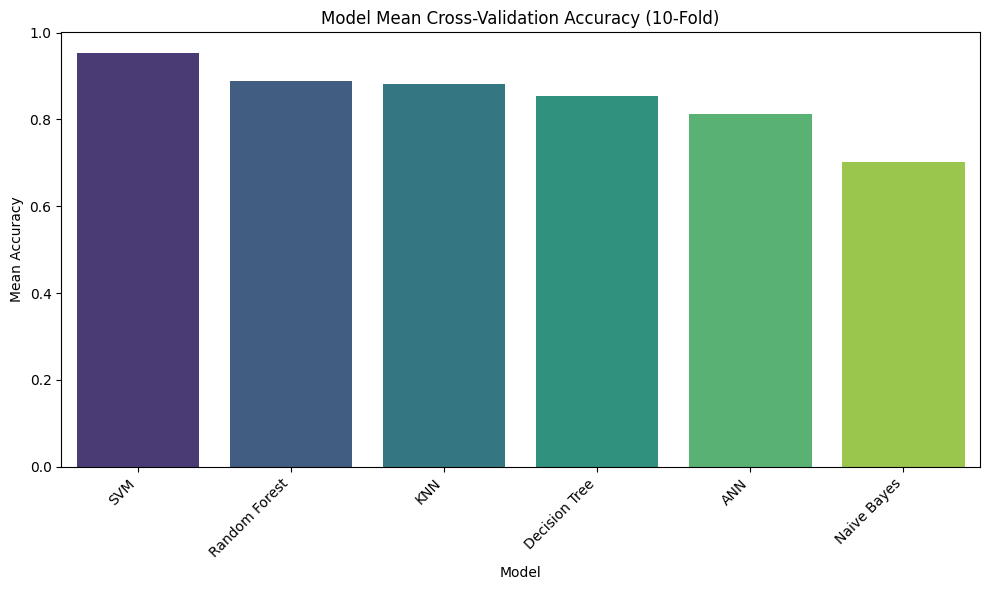

In [179]:
from sklearn.model_selection import KFold, cross_val_score
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

kf = KFold(n_splits=10, shuffle=True, random_state=42)

cv_results = {}


dt_model_cv = DecisionTreeClassifier(max_depth=5, min_samples_leaf=5, random_state=42)
cv_scores_dt = cross_val_score(dt_model_cv, X, y, cv=kf, scoring='accuracy')
cv_results['Decision Tree'] = cv_scores_dt.mean()


rf_model_cv = RandomForestClassifier(n_estimators=50, max_depth=4, min_samples_leaf=20, random_state=42)
cv_scores_rf = cross_val_score(rf_model_cv, X, y, cv=kf, scoring='accuracy')
cv_results['Random Forest'] = cv_scores_rf.mean()

# KNN Classifier (Adjusted hyperparameters)
knn_model_cv = KNeighborsClassifier(n_neighbors=20)

scaler_knn = StandardScaler()
X_scaled_knn = scaler_knn.fit_transform(X)
cv_scores_knn = cross_val_score(knn_model_cv, X_scaled_knn, y, cv=kf, scoring='accuracy')
cv_results['KNN'] = cv_scores_knn.mean()

# Naive Bayes
nb_model_cv = GaussianNB()
cv_scores_nb = cross_val_score(nb_model_cv, X, y, cv=kf, scoring='accuracy')
cv_results['Naive Bayes'] = cv_scores_nb.mean()

# SVM Classifier
svm_model_cv = SVC(random_state=42)

scaler_svm = StandardScaler()
X_scaled_svm = scaler_svm.fit_transform(X)
cv_scores_svm = cross_val_score(svm_model_cv, X_scaled_svm, y, cv=kf, scoring='accuracy')
cv_results['SVM'] = cv_scores_svm.mean()


ann_accuracies = []

for fold, (train_index, test_index) in enumerate(kf.split(X, y)):
    print(f"Processing Fold {fold+1}/10")
    X_train_fold, X_test_fold = X.iloc[train_index], X.iloc[test_index]
    y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]

    scaler_ann = StandardScaler()
    X_train_fold_scaled = scaler_ann.fit_transform(X_train_fold)
    X_test_fold_scaled = scaler_ann.transform(X_test_fold)

    input_dl = X_train_fold_scaled.shape[1]
    model_ann_cv = keras.Sequential([
        layers.Input(shape=(input_dl,)),
        layers.Dense(64, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.2),
        layers.Dense(32, activation='relu'),
        layers.Dropout(0.2),
        layers.Dense(len(np.unique(y_train_fold)), activation='softmax')
    ])

    model_ann_cv.compile(
        optimizer=keras.optimizers.Adam(learning_rate=1e-4),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )


    history_ann_cv = model_ann_cv.fit(
        X_train_fold_scaled, y_train_fold,
        epochs=20,
        batch_size=32,
        verbose=0
    )


    loss_ann_fold, accuracy_ann_fold = model_ann_cv.evaluate(X_test_fold_scaled, y_test_fold, verbose=0)
    ann_accuracies.append(accuracy_ann_fold)
    print(f"Fold {fold+1} Accuracy: {accuracy_ann_fold:.4f}")

cv_results['ANN'] = np.mean(ann_accuracies)


print("\nCross-Validation Mean Accuracy (10-Fold):")
for model_name, mean_accuracy in cv_results.items():
    print(f"{model_name}: {mean_accuracy:.4f}")

cv_df = pd.DataFrame.from_dict(cv_results, orient='index', columns=['Mean Accuracy'])
cv_df = cv_df.sort_values(by='Mean Accuracy', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=cv_df.index, y='Mean Accuracy', data=cv_df, palette='viridis')
plt.title('Model Mean Cross-Validation Accuracy (10-Fold)')
plt.xlabel('Model')
plt.ylabel('Mean Accuracy')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [180]:

accuracy_df.loc['KNN', 'Accuracy'] = knn_accuracy
accuracy_df = accuracy_df.sort_values(by='Accuracy', ascending=False)


accuracy_df_renamed = accuracy_df.rename(columns={'Accuracy': 'Single_Split_Accuracy'})

cv_df_renamed = pd.DataFrame.from_dict(cv_results, orient='index', columns=['KFold_Mean_Accuracy'])


comparison_df = pd.concat([accuracy_df_renamed, cv_df_renamed], axis=1)


print("\nModel Accuracy Comparison (Single Split vs. K-Fold Mean):")
display(comparison_df.sort_values(by='KFold_Mean_Accuracy', ascending=False))


Model Accuracy Comparison (Single Split vs. K-Fold Mean):


,Single_Split_Accuracy,KFold_Mean_Accuracy
SVM,0.973333,0.953
Random Forest,0.860000,0.889
KNN,0.873333,0.882
Decision Tree,0.873333,0.853
ANN,0.813333,0.812
Naive Bayes,0.686667,0.702


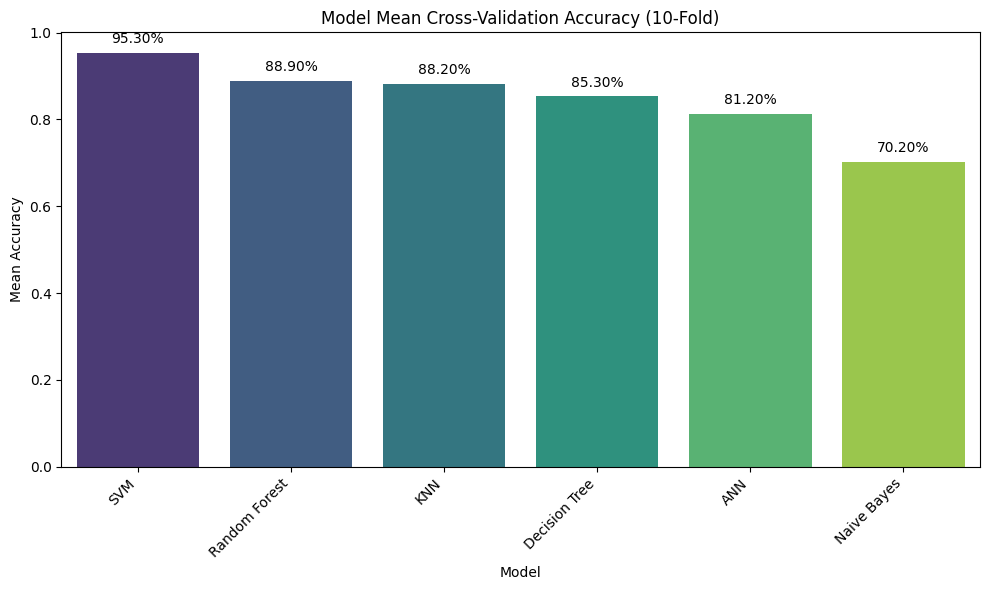

In [181]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


cv_df = pd.DataFrame.from_dict(cv_results, orient='index', columns=['Mean Accuracy'])


cv_df = cv_df.sort_values(by='Mean Accuracy', ascending=False)

plt.figure(figsize=(10, 6))
ax = sns.barplot(x=cv_df.index, y='Mean Accuracy', data=cv_df, palette='viridis')
plt.title('Model Mean Cross-Validation Accuracy (10-Fold)')
plt.xlabel('Model')
plt.ylabel('Mean Accuracy')
plt.xticks(rotation=45, ha='right')

# Add accuracy percentages on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2%}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom',
                xytext=(0, 5),
                textcoords='offset points')

plt.tight_layout()
plt.show()

In [182]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
import pandas as pd
import numpy as np


feature_cols = ['Air Pollution', 'OccuPational Hazards', 'Passive Smoker', 'Genetic Risk', 'Smoking', 'Age']


individual_label_encoders = {}
for col in feature_cols:
    le = LabelEncoder()

    le.fit(cancer_indices_df[col])
    individual_label_encoders[col] = le

new_patient_raw_data = pd.DataFrame({
    'Air Pollution': [5],
    'OccuPational Hazards': [6],
    'Passive Smoker': [4],
    'Genetic Risk': [5],
    'Smoking': [5],
    'Age': [45]
})

print("New Patient Raw Input:")
display(new_patient_raw_data)

new_patient_encoded = new_patient_raw_data.copy()

for col in feature_cols:
    try:
        new_patient_encoded[col] = individual_label_encoders[col].transform(new_patient_raw_data[col])
    except ValueError as e:
        print(f"Error encoding '{col}': {e}. Ensure input value exists in original training data.")

print("\nNew Patient Encoded Input:")
display(new_patient_encoded)


new_patient_scaled = scaler_svm_individual.transform(new_patient_encoded)


predicted_level_index = svm_model.predict(new_patient_scaled)


reverse_level_mapping = {0: 'Low', 1: 'High', 2: 'Medium'}
predicted_level = reverse_level_mapping[predicted_level_index[0]]

print(f"\nThe predicted lung cancer risk level for this patient is: {predicted_level}")

New Patient Raw Input:


,Air Pollution,OccuPational Hazards,Passive Smoker,Genetic Risk,Smoking,Age
0,5,6,4,5,5,45



New Patient Encoded Input:


,Air Pollution,OccuPational Hazards,Passive Smoker,Genetic Risk,Smoking,Age
0,4,5,3,4,4,24



The predicted lung cancer risk level for this patient is: Low


In [183]:
# Define the mapping used to convert 'Level' strings to numbers
level_mapping = {'Low': 0, 'High': 1, 'Medium': 2}
reverse_level_mapping = {0: 'Low', 1: 'High', 2: 'Medium'}

# Filter for patients with 'High' lung cancer risk (Level = 1)
high_risk_patients = cancer_indices_df[cancer_indices_df['Level'] == level_mapping['High']]

print(f"Patients with '{reverse_level_mapping[level_mapping['High']]}' Lung Cancer Risk:")
display(high_risk_patients)

Patients with 'High' Lung Cancer Risk:


,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
2,2,P100,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,1
3,3,P1000,37,1,7,7,7,7,6,7,...,4,2,3,1,4,5,6,7,5,1
4,4,P101,46,1,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,1
5,5,P102,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,1
10,10,P107,44,1,6,7,7,7,7,6,...,5,3,2,7,8,2,4,5,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,P995,44,1,6,7,7,7,7,6,...,5,3,2,7,8,2,4,5,3,1
996,996,P996,37,2,6,8,7,7,7,6,...,9,6,5,7,2,4,3,1,4,1
997,997,P997,25,2,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,1
998,998,P998,18,2,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,1
